<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW3.3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.3 Unconstrained Optimization**

---

### **Key Concepts:**

*   3.3.1. Necessary and sufficient conditions of local minimizers
*   3.3.2. Convexity and global minimizers
*   3.3.3. Gradient descent

In [15]:
### important imports to run code ###

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

## **3.3.1. Necessary and Sufficient Conditions of Local Minimizers**

**Necessary and Sufficient Conditions of Local Minimizers:** To identify a local minimizer of a function $f(x)$, we use derivatives. For a function $f: ℝ^n → ℝ$ , the necessary and sufficient conditions are based on its first and second derivatives:

If $x^*$ is a local minimizer of $f(x)$, then:

The graduent at $x^*$ must be zero, $∇f(x^*) = 0$

This means that the slope of the function at $x^*$ is flat.

For $x^*$ to be a local minimizer, not only should the gradient be zero, but the second derivative (also known as Hessian) should be positive semi-definite.

The Hessian matrix $H(f)$ must be positive semi-definite at $x^*$: $H(f)(x^*)≥ 0$

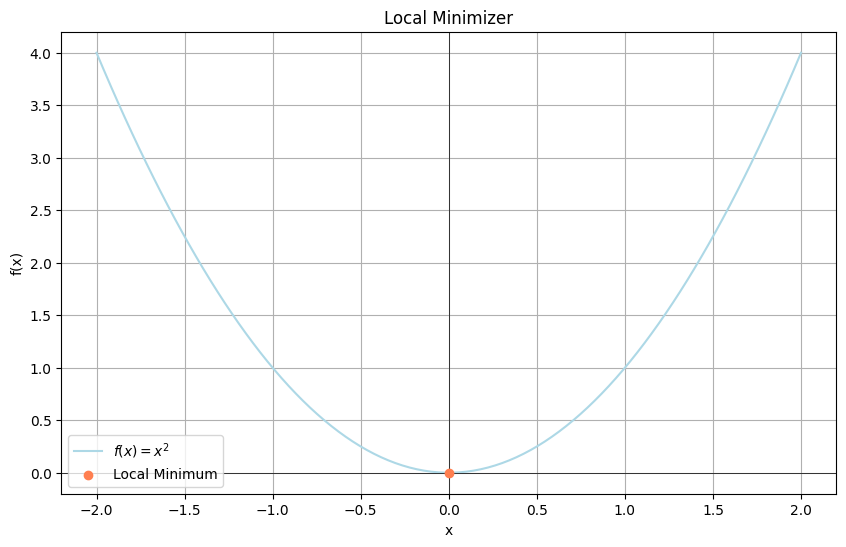

In [16]:
# Define the function
def f(x):
    return x**2
# Define the derivative
def df(x):
    return 2*x

# Generate values to graph from -2 to 2 with 100 points
x_vals = np.linspace(-2, 2, 100)
# Push the values into the function
y_vals = f(x_vals)
# Find the derivative of the values in the function
grad_vals = df(x_vals)

# Plot the function and the corresponding gradient
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2$', color='lightblue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Mark the minimum
plt.scatter(0, f(0), color='coral', zorder=5, label='Local Minimum')

plt.title('Local Minimizer')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## **3.3.2. Convexity and Global Minimizers**

**Convexity and Global Minimizers:** A real-valued function is called convex if the line segment between any two points on the graph of the function lies above the graph between the two points. Our optimality conditions have only concerned local minimizers. Indeed, in the absence of global structure, local information such as gradients and Hessians can only inform about the immediate neighborhood of points. Here we consider convexity, under which local minimizers are also global minimizers.

Convexity plays a crucial role in optimization because it ensures that any local minimum is also a global minimum. A function $f(x)$ is convex if:

$f(λx_1 + (1 - λ)x_2)≤λf(x_1) + (1 - λ)f(x_2)$

for all $x_1, x_2,$ and $λ ∈|0,1|$

If $f$ is convex and differentiable, then any point where the gradient is zero is a global minimizer.

The second-order condition for convexity is that the Hessian matrix $H(f) is positive semi-definite for all x.

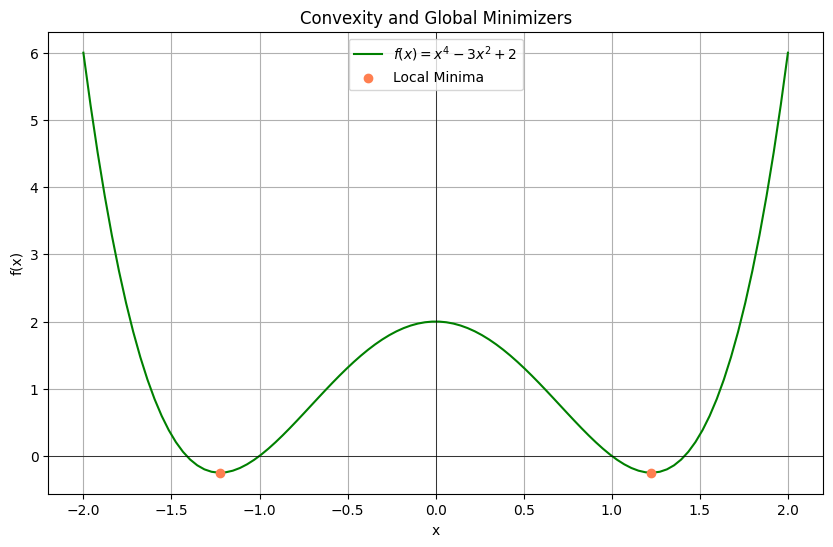

In [17]:
# Define a convex function
def convex_f(x):
    return x**4 - 3*x**2 + 2

# Generate values to graph from -2 to 2 with 100 points
x_vals = np.linspace(-2, 2, 100)
y_vals = convex_f(x_vals)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^4 - 3x^2 + 2$', color='green')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Mark the local minimum/s
local_min_x = -np.sqrt(3/2)
plt.scatter([local_min_x, -local_min_x], [convex_f(local_min_x), convex_f(-local_min_x)], color='coral', zorder=5, label='Local Minima')

plt.title('Convexity and Global Minimizers')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## **3.3.3. Gradient Descent**

**Gradient Descent:** an iterative optimization algorithm used to find the minimum of a function. It works by taking steps proportional to the negative of the gradient of the function at the current point.

For a function $f(x)$, the gradient descent update rule is:

$x_{k+1}=x_k - α∇f(x_k)$

where $α$ is the learning rate, and $∇f(x_k)$ is the gradient of the function at $x_k$.

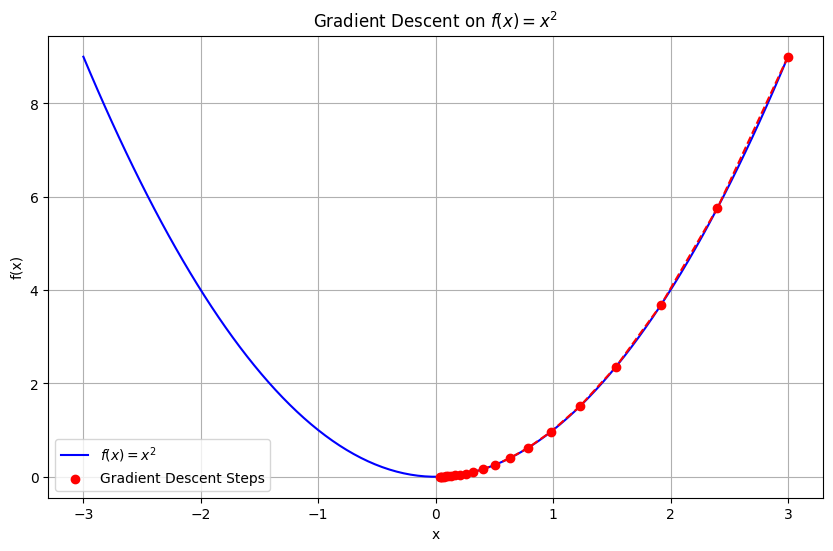

In [18]:
# Define the correct quadratic function and its derivative
def f(x):
    return x**2

def df(x):
    return 2*x

# Generate values for the function to plot from -3 to 3 with 100 points
x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)

# Gradient Descent Algorithm, starting at the initial value and storing the steps
def improved_gradient_descent(df, x_init, learning_rate=0.1, tolerance=1e-6, max_iterations=100):
    x = x_init
    history = [x]

    for i in range(max_iterations):
      # compare the gradient and generate the norm
        grad = df(x)
        grad_norm = np.linalg.norm(grad)

        # Stop if the gradient is very small close to zero (close to minimum)
        if grad_norm < tolerance:
            break

        # Update the parameter with gradient descent step
        # Moving in the opposite direction of the gradient
        x = x - learning_rate * grad
        history.append(x)

    return np.array(history)

# Initial value, learning rate, and tolerance
x_init = 3.0
learning_rate = 0.1
# Tolerance to stop close to the minimum
tolerance = 1e-6
max_iterations = 20

# Run gradient descent and save the steps
history = improved_gradient_descent(df, x_init, learning_rate, tolerance, max_iterations)

# Plot the function and the path of gradient descent
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2$', color='blue')
plt.scatter(history, f(history), color='red', zorder=5, label='Gradient Descent Steps')
plt.plot(history, f(history), linestyle='--', color='red')

plt.title('Gradient Descent on $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
